In [1]:
import qiskit as q

In [2]:
q.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('6c364aecc54a6f78cfc4abda8a5c7b770cb7601de9ae7058004a3747aee92217ae741bc8cbcce7408b0b28a55e082b4f454f68c61df9c0e888dc0c6a824ff4c4')

configrc.store_credentials:WARNING:2022-01-27 02:40:45,426: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from array_to_latex import to_ltx
from IPython.display import Markdown, display

In [7]:
def printmd(string):
    display(Markdown(string))
def printarray(array,preface=""):
    printmd("$"+preface+to_ltx(array, frmt = '{:6.2f}', arraytype = 'pmatrix',print_out= False)+"$")

 - Terra .- Herramientas para la construcción de circuitos cuánticos. Desde la interfaz de alto nivel hasta protocolos de pulsos.
 - Aqua .- Algoritmos con enfoque a aplicaciones. (química, finanzas,machine learning, optimización)
 - Ignis .- Herramientas para benchmarking, caracterización y corrección de errores.
 - Aer .- Simuladores y emuladores

# Hello Quantum world! 

Let's develop our first quantum program by saying hi to the world.

In [8]:
#Build a 2 qubit quantum circuit

qr = q.QuantumRegister(2) #a two qubit quantum register
cr = q.ClassicalRegister(2) #a two bit classical register
#Create the circuit using the to registers
circuit = q.QuantumCircuit(qr, cr)


In [9]:
#We can also draw our circuits! 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
circuit.draw() #We see two qubits and two classical bits

q0_0: 
      
q0_1: 
      
c0: 2/

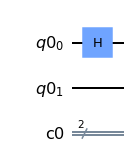

In [11]:
 #Create entanglement by a Hadamar gate onto the first qubit
circuit.h(qr[0])
circuit.draw(output='mpl')

In [12]:
#Apply a two qubit operation called controlled X
circuit.cx(qr[0],qr[1]) #qr[0] is the controll qubit while qr[1] is the target

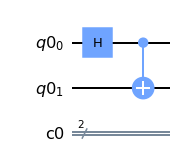

In [13]:
circuit.draw(output='mpl')

In [14]:
#We have now defined our entanglement circuit, now it's timw to measure the quatum bits and store those meassurements into the classical bits
circuit.measure(qr,cr)

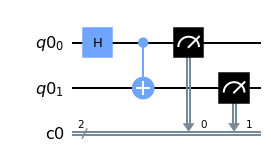

In [15]:
circuit.draw(output='mpl')

#### The moment of truth, let's run the circuit and see what happens. Run it in simulation on Quiskit and then on a real QPU at IBM



In [16]:
from qiskit import BasicAer as Aer
simulator = Aer.get_backend('qasm_simulator') #qasm = quantum assesment language

In [17]:
result = q.execute(circuit, backend = simulator).result()

In [18]:
from qiskit.tools.visualization import plot_histogram

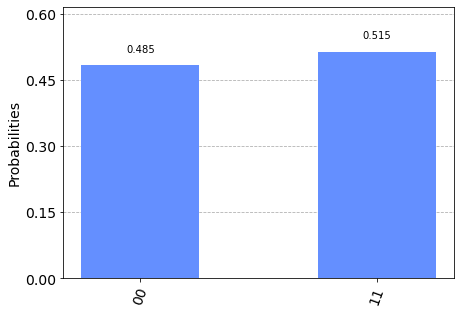

In [19]:
plot_histogram(result.get_counts(circuit))

The difference in the meassurments is because of the finite meassurments the simulator runs. Let see what happens when we run it on a real QPU at IBM experience

In [20]:
provider = IBMQ.get_provider('ibm-q')

In [25]:
qcomp = provider.get_backend('ibmq_bogota') #We check the IBM QE website to check which system is online

In [26]:
job = q.execute(circuit,backend=qcomp)

In [23]:
from qiskit.tools.monitor import job_monitor #This tool let us see our queu within the server

In [27]:
job_monitor(job)

Job Status: job has successfully run


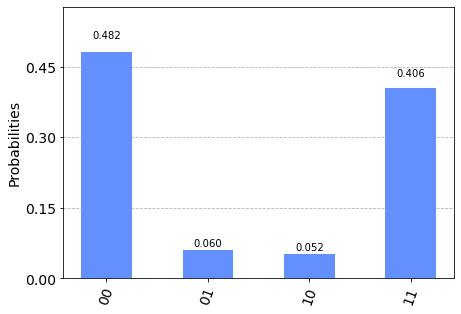

In [28]:
result_qpu = job.result()
plot_histogram(result_qpu.get_counts(circuit))